In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [40]:
features1 = pd.read_csv('/home/dan/Bird/Analysis/feature_vector.csv',header = None,names=["sound.files","selec","duration","meanfreq","sd","freq.median","freq.Q25","freq.Q75","freq.IQR","time.median","time.Q25","time.Q75","time.IQR","skew","kurt","sp.ent","time.ent","entropy","sfm","meandom","mindom","maxdom","dfrange","modindx","startdom","enddom","dfslope","meanpeakf"
])
metadata1 = pd.read_csv('/home/dan/Bird/Analysis/USA_Texas_A.csv', encoding = "ISO-8859-1")

In [41]:
def add_metadata(metadata, features):
   names = [x.split("-") for x in features['sound.files']]
   ids = [int(x[2].replace(".wav",'')) for x in names]
   ordered_metadata = pd.DataFrame()
   for i in ids:
       df = metadata[metadata.Recording_ID == i]
       ordered_metadata = ordered_metadata.append(df,ignore_index=True)
   X = ordered_metadata.join(features)
   good_rows = features.iloc[:,1:].apply(lambda x : not np.any(np.isnan(x)), axis = 1)
   mystery_rows = [x[0] == "Mystery" or x[0] == "Sonus" for x in names]
   #print([x[1] == "Soundscape" for x in names].count(True))
   return X[[a and not b for a,b in zip(good_rows,mystery_rows)]]

In [42]:
len(features1)

13480

In [43]:
good_boi1 = add_metadata(metadata1,features1)

len(good_boi1)

13226

In [44]:
good_boi1.columns


Index(['Recording_ID', 'Genus', 'Specific_epithet', 'Subspecies',
       'English_name', 'Recordist', 'Country', 'Locality', 'Latitude',
       'Longitude', 'Vocalization_type', 'Audio_file', 'License', 'Url',
       'Quality', 'Time', 'Date', 'sound.files', 'selec', 'duration',
       'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75', 'freq.IQR',
       'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew', 'kurt',
       'sp.ent', 'time.ent', 'entropy', 'sfm', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx', 'startdom', 'enddom', 'dfslope', 'meanpeakf'],
      dtype='object')

In [45]:
len(good_boi1['Genus'].value_counts())

119

In [46]:
len(good_boi1['English_name'].value_counts())

249

In [47]:
with pd.option_context('display.max_rows',1000, 'display.max_columns', None):
    print(good_boi1['English_name'].value_counts())

Northern Cardinal                440
Common Yellowthroat              386
Black-headed Grosbeak            315
Western Meadowlark               301
Brown-crested Flycatcher         288
Song Sparrow                     253
Indigo Bunting                   240
American Yellow Warbler          228
Eastern Meadowlark               213
Lazuli Bunting                   187
MacGillivray's Warbler           186
Wilson's Warbler                 183
Ovenbird                         175
Dickcissel                       169
Blue Grosbeak                    165
American Redstart                164
Scott's Oriole                   162
Red-winged Blackbird             155
Hooded Warbler                   154
Swainson's Warbler               152
Myrtle Warbler                   149
Black-and-white Warbler          147
Louisiana Waterthrush            144
Chestnut-sided Warbler           143
Lucy's Warbler                   142
Black-throated Grey Warbler      139
Painted Whitestart               137
N

In [48]:
X=good_boi1['English_name'].value_counts()[0:10]

In [49]:
L=X.index

In [50]:
L

Index(['Northern Cardinal', 'Common Yellowthroat', 'Black-headed Grosbeak',
       'Western Meadowlark', 'Brown-crested Flycatcher', 'Song Sparrow',
       'Indigo Bunting', 'American Yellow Warbler', 'Eastern Meadowlark',
       'Lazuli Bunting'],
      dtype='object')

In [51]:

for x in range(0,10):    
    if x==0:
        filter_boy=good_boi1[good_boi1['English_name']==L[x]]
    else:
        filter_boy=filter_boy.append(good_boi1[good_boi1['English_name']==L[x]],ignore_index=True)
    print(x)

0
1
2
3
4
5
6
7
8
9


In [52]:
len(filter_boy)

2851

### Let's make some scatter plots

In [53]:
names=filter_boy.English_name

In [54]:
y = names.astype("category").cat.codes

In [55]:
X

Northern Cardinal           440
Common Yellowthroat         386
Black-headed Grosbeak       315
Western Meadowlark          301
Brown-crested Flycatcher    288
Song Sparrow                253
Indigo Bunting              240
American Yellow Warbler     228
Eastern Meadowlark          213
Lazuli Bunting              187
Name: English_name, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

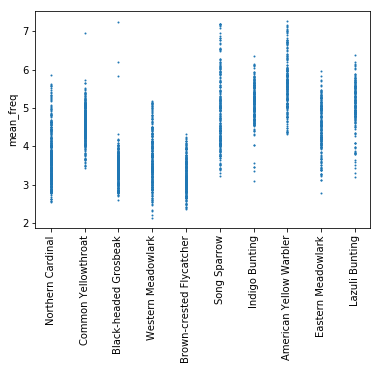

In [23]:

plt.scatter(names,filter_boy.meanfreq,s=1)
plt.ylabel("mean_freq")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

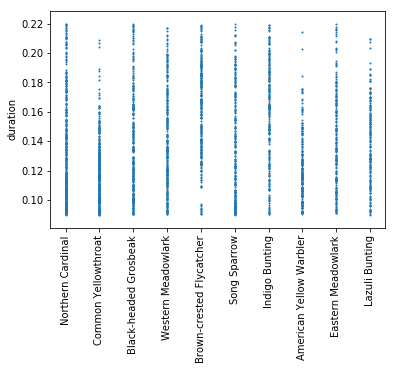

In [219]:
plt.scatter(names,filter_boy.duration,s=1)
plt.ylabel("duration")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

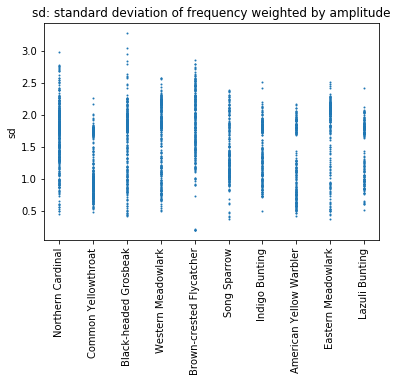

In [220]:
plt.scatter(names,filter_boy.sd,s=1)
plt.title('sd: standard deviation of frequency weighted by amplitude')
plt.ylabel("sd")
plt.xticks(rotation=90)

In [221]:
filter_boy.columns

Index(['Recording_ID', 'Genus', 'Specific_epithet', 'Subspecies',
       'English_name', 'Recordist', 'Country', 'Locality', 'Latitude',
       'Longitude', 'Vocalization_type', 'Audio_file', 'License', 'Url',
       'Quality', 'Time', 'Date', 'sound.files', 'selec', 'duration',
       'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75', 'freq.IQR',
       'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew', 'kurt',
       'sp.ent', 'time.ent', 'entropy', 'sfm', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx', 'startdom', 'enddom', 'dfslope', 'meanpeakf'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

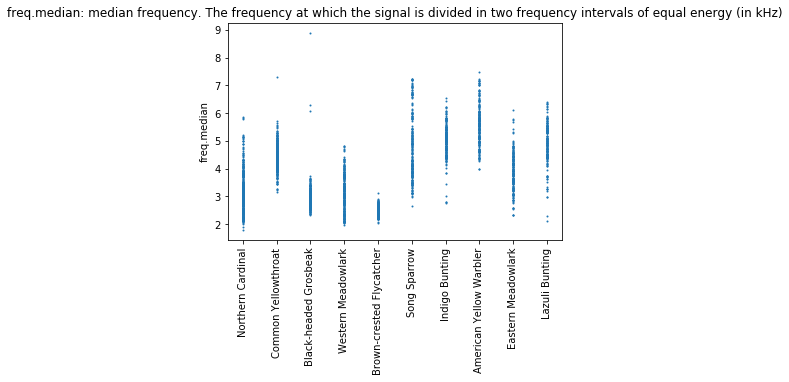

In [222]:
plt.scatter(names,filter_boy['freq.median'],s=1)
plt.title('freq.median: median frequency. The frequency at which the signal is divided in two frequency intervals of equal energy (in kHz)')
plt.ylabel("freq.median")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

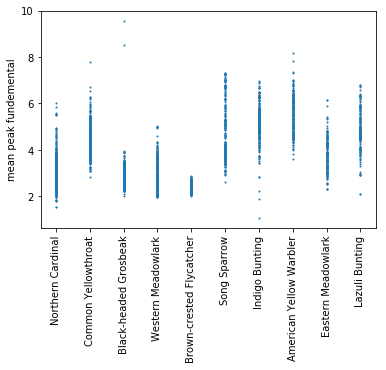

In [224]:
plt.scatter(names,filter_boy['meanpeakf'],s=1)
#plt.title('y intervals of equal energy (in kHz)')
plt.ylabel("mean peak fundemental")
plt.xticks(rotation=90)

In [225]:
names_d={}
for i in range(0,len(names)):
    names_d[y[i]]=names[i] 

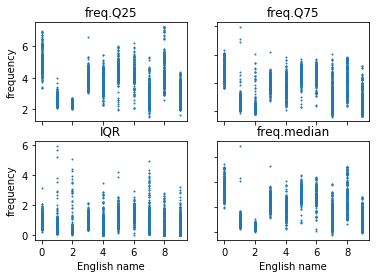

In [226]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(y,filter_boy['freq.Q25'],s=1)
axs[0, 0].set_title('freq.Q25')
axs[0, 1].scatter(y,filter_boy['freq.Q75'],s=1)
axs[0, 1].set_title('freq.Q75')
axs[1, 0].scatter(y,filter_boy['freq.IQR'],s=1)
axs[1, 0].set_title('IQR')
axs[1, 1].scatter(y,filter_boy['freq.median'],s=1)
axs[1, 1].set_title('freq.median')
for ax in axs.flat:
    ax.set(xlabel='English name', ylabel='frequency')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [176]:
print('LEGEND')
for name, age in names_d.items():
    print('{} {}'.format(name, age))

LEGEND
4 Common Yellowthroat
6 Indigo Bunting
1 American Yellow Warbler
7 Lazuli Bunting
9 Soundscape
2 Blue Grosbeak
0 American Redstart
8 Red-winged Blackbird
5 Hooded Warbler
3 Chestnut-sided Warbler


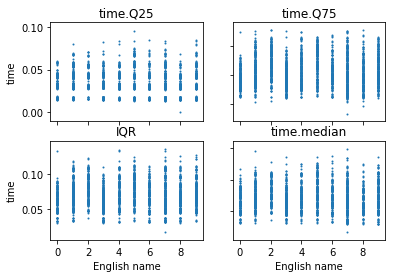

In [227]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(y,filter_boy['time.Q25'],s=1)
axs[0, 0].set_title('time.Q25')
axs[0, 1].scatter(y,filter_boy['time.Q75'],s=1)
axs[0, 1].set_title('time.Q75')
axs[1, 0].scatter(y,filter_boy['time.IQR'],s=1)
axs[1, 0].set_title('IQR')
axs[1, 1].scatter(y,filter_boy['time.median'],s=1)
axs[1, 1].set_title('time.median')
for ax in axs.flat:
    ax.set(xlabel='English name', ylabel='time')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

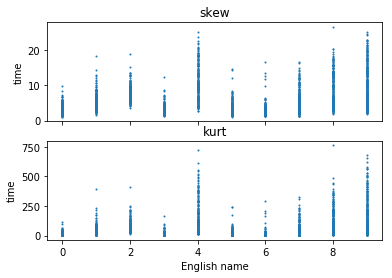

In [228]:
fig, axs = plt.subplots(2)
axs[0].scatter(y,filter_boy['skew'],s=1)
axs[0].set_title('skew')
axs[1].scatter(y,filter_boy['kurt'],s=1)
axs[1].set_title('kurt')

for ax in axs.flat:
    ax.set(xlabel='English name', ylabel='time')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

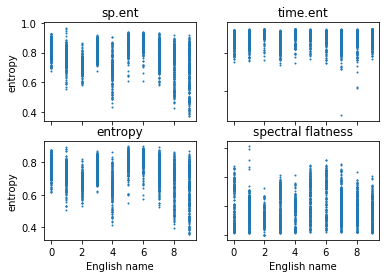

In [229]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(y,filter_boy['sp.ent'],s=1)
axs[0, 0].set_title('sp.ent')
axs[0, 1].scatter(y,filter_boy['time.ent'],s=1)
axs[0, 1].set_title('time.ent')
axs[1, 0].scatter(y,filter_boy['entropy'],s=1)
axs[1, 0].set_title('entropy')
axs[1, 1].scatter(y,filter_boy['sfm'],s=1)
axs[1, 1].set_title('spectral flatness')
for ax in axs.flat:
    ax.set(xlabel='English name', ylabel='entropy')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [192]:
?plt.subplot

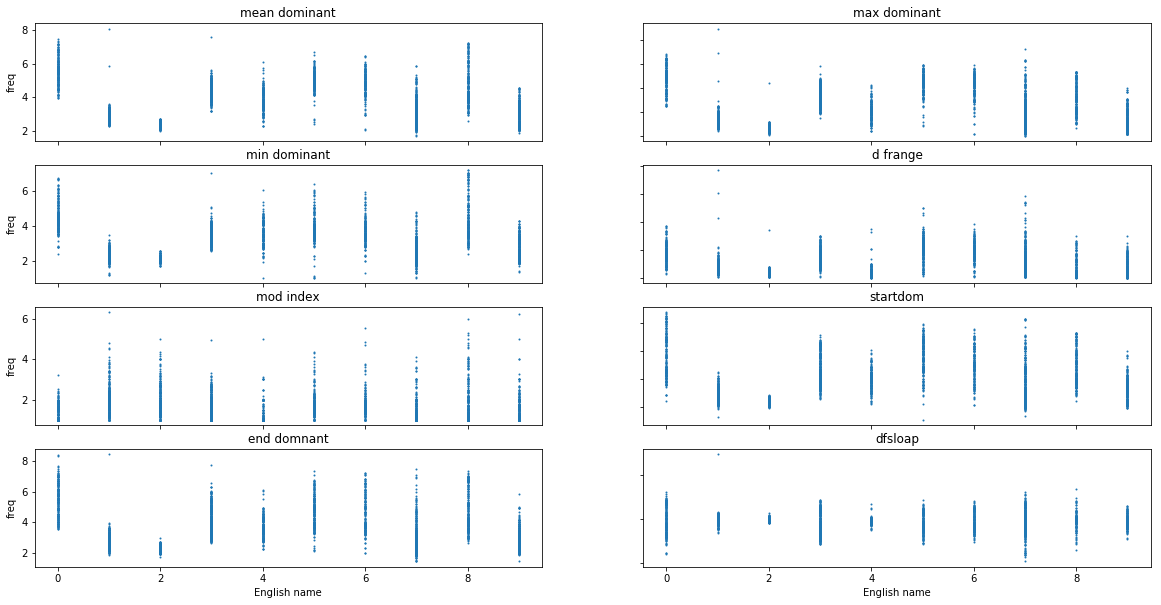

In [230]:
fig, axs = plt.subplots(4,2,figsize=(20,10))

axs[0,0].scatter(y,filter_boy['meandom'],s=1)
axs[0,0].set_title('mean dominant')
axs[0,1].scatter(y,filter_boy['maxdom'],s=1)
axs[0,1].set_title('max dominant')
axs[1,0].scatter(y,filter_boy['mindom'],s=1)
axs[1,0].set_title('min dominant')
axs[1,1].scatter(y,filter_boy['dfrange'],s=1)
axs[1,1].set_title('d frange')
axs[2,0].scatter(y,filter_boy['modindx'],s=1)
axs[2,0].set_title('mod index')
axs[2,1].scatter(y,filter_boy['startdom'],s=1)
axs[2,1].set_title('startdom')
axs[3,0].scatter(y,filter_boy['enddom'],s=1)
axs[3,0].set_title('end domnant')
axs[3,1].scatter(y,filter_boy['dfslope'],s=1)
axs[3,1].set_title('dfsloap')
#axs[].scatter(y,filter_boy['sfm'])
#axs[1, 1].set_title('spectral flatness')
for ax in axs.flat:
    ax.set(xlabel='English name', ylabel='freq')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [98]:
X=filter_boy.loc[:,['meanfreq','sd', 'freq.median', 'freq.Q25', 'freq.Q75', 'freq.IQR',
       'skew', 'kurt','sp.ent','entropy', 'sfm', 'meandom', 'mindom', 'maxdom','dfrange', 'modindx', 'startdom', 'enddom', 'dfslope', 'meanpeakf']]
Y=filter_boy['English_name']

In [99]:
X.shape

(2851, 20)

In [100]:
names=filter_boy.English_name

In [101]:
y = names.astype("category").cat.codes

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)


## For Original Data

### Linear regression

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.17375727238686048

### K- nearest neighbours


<IPython.core.display.Javascript object>


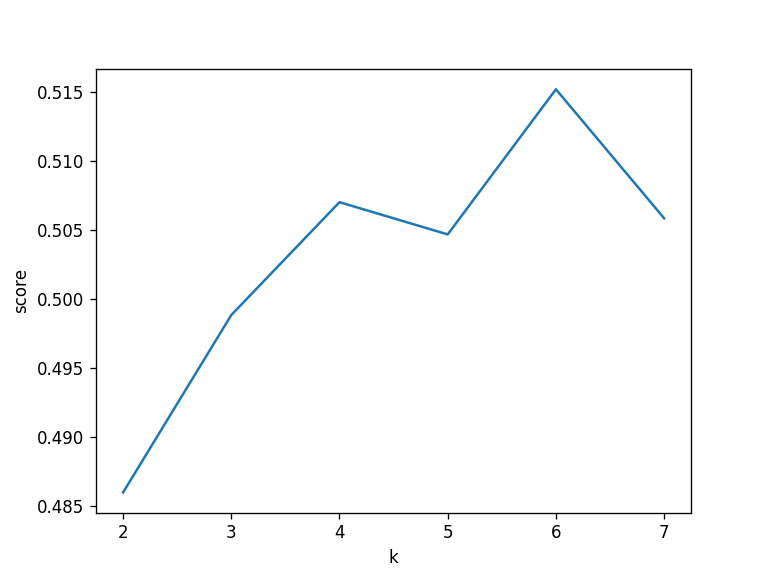

In [109]:
from sklearn.neighbors import KNeighborsClassifier 
scores = {}

for k in range(2,8):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)

plt.plot([float(y) for y in scores.keys()], [float(x) for x in scores.values()])
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [110]:
from sklearn import metrics
predicted = knn.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51        68
           1       0.52      0.64      0.57        95
           2       0.55      0.82      0.66        87
           3       0.53      0.75      0.62       116
           4       0.38      0.45      0.41        64
           5       0.55      0.40      0.46        72
           6       0.48      0.29      0.36        56
           7       0.56      0.48      0.52       132
           8       0.46      0.29      0.35        76
           9       0.37      0.20      0.26        90

   micro avg       0.51      0.51      0.51       856
   macro avg       0.49      0.49      0.47       856
weighted avg       0.50      0.51      0.49       856



In [64]:
print(metrics.confusion_matrix(y_test, predicted))

[[30  0  0 20  0  8  4  2  3  1]
 [ 1 48 25  2  1  0  1 13  0  4]
 [ 0  5 73  0  2  0  0  2  0  5]
 [ 4  2  2 91  0  5  5  5  2  0]
 [ 0  3  5  1 33  0  0  1  7 14]
 [11  2  1 11  5 30  6  1  5  0]
 [ 4  2  1 22  0 17  6  1  3  0]
 [ 4 20 13 18  2  1  0 60  3 11]
 [ 5  4  4 10 17  1  0  3 23  9]
 [ 0 17 17  1  5  0  0 14 10 26]]


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel="poly",gamma=0.5, C=0.025)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

In [95]:
from sklearn.svm import SVC
model = SVC(gamma=0.08, C=10)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5408878504672897


In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.6308411214953271


In [246]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5817757009345794


In [247]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5841121495327103


In [248]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5619158878504673


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(kernel='poly')).fit(X_train, y_train)
print(model.score(X_test, y_test))

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model = OneVsOneClassifier(SVC(kernel='poly',gamma='auto')).fit(X_train, y_train)
print(model.score(X_test, y_test))

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model = OneVsOneClassifier(SVC(kernel='linear',gamma='auto')).fit(X_train, y_train)
print(model.score(X_test, y_test))

In [42]:
var=np.var(X,axis=0)
var

meanfreq          0.940415
sd                0.299056
freq.median       1.324306
freq.Q25          0.842573
freq.Q75          2.778496
freq.IQR          2.104349
skew             15.222455
kurt           7202.059486
sp.ent            0.009857
time.ent          0.000450
entropy           0.008998
sfm               0.030360
meandom           1.417921
mindom            1.202714
maxdom            2.849265
dfrange           2.225645
modindx           1.037679
startdom          1.776609
enddom            1.804933
dfslope          67.840383
meanpeakf         1.847416
dtype: float64

In [43]:
import numpy as np
mean_bird = np.mean(X, axis=0)
mean_bird

meanfreq        3.732862
sd              1.946468
freq.median     3.211067
freq.Q25        2.573352
freq.Q75        4.244285
freq.IQR        1.670932
skew            6.329088
kurt           68.287240
sp.ent          0.811297
time.ent        0.939716
entropy         0.762342
sfm             0.331584
meandom         2.862249
mindom          2.280243
maxdom          3.559410
dfrange         1.279166
modindx         2.186181
startdom        2.726660
enddom          2.796137
dfslope         0.481046
meanpeakf       2.765378
dtype: float64

## We are doing SVD and only keeping dominant vectors


In [96]:
 import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,solver='svd', store_covariance=False, tol=0.0001)
#clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)  
print(clf.score(X_test,y_test))

0.5584112149532711


/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [89]:
import numpy as np
from sklearn import preprocessing
XX=preprocessing.normalize(X)
U, s, V = np.linalg.svd(XX)


In [90]:
s

array([4.70011787e+01, 1.98593176e+01, 1.53503917e+01, 1.85763728e+00,
       1.78320668e+00, 1.23148836e+00, 1.12785621e+00, 9.59400180e-01,
       8.53622046e-01, 5.71740618e-01, 4.01359529e-01, 3.74238284e-01,
       2.53094650e-01, 1.97025536e-01, 1.78353097e-01, 1.47869142e-01,
       9.35749143e-02, 2.13478590e-02, 4.74469949e-15, 2.33085494e-15])

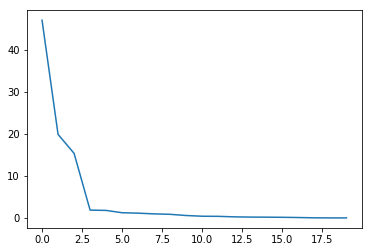

In [72]:
plt.plot(s)
plt.show()

In [91]:
s[3:] = 0
S = np.zeros(X.shape)
S[:len(s), :len(s)] = np.diag(s)
US = np.matmul(U,S)
Xp = np.matmul(np.matmul(U,S),V)


In [92]:
US.shape

(2851, 20)

<IPython.core.display.Javascript object>


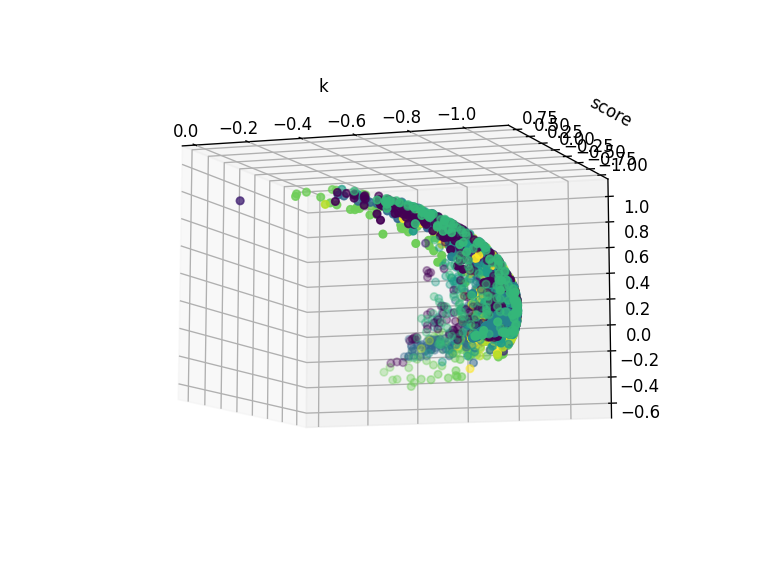

In [93]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(US[:,0],US[:,1],US[:,2], c=y )
plt.show()

In [76]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(US[:,[0,1,2]],y, test_size = 0.3, stratify=y)

In [77]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model = OneVsOneClassifier(SVC(kernel='linear',gamma='auto')).fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.28738317757009346


In [78]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model = OneVsOneClassifier(SVC(kernel='poly',gamma='auto')).fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.26401869158878505


In [79]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(kernel='linear',gamma='auto')).fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.21495327102803738


In [80]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(kernel='poly',gamma='auto')).fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.20210280373831777


In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xp_train,yp_train)
model.score(Xp_test,yp_test)

0.05147052820978082

In [82]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(Xp_train, yp_train)
print(knn.score(Xp_test, yp_test))

0.3679906542056075


In [83]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=0.025)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.20794392523364486


In [84]:
from sklearn.svm import SVC
model = SVC(gamma=0.05, C=5)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.29205607476635514


In [85]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.2908878504672897


In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.10335195530726257


In [106]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.12064516129032259


<IPython.core.display.Javascript object>


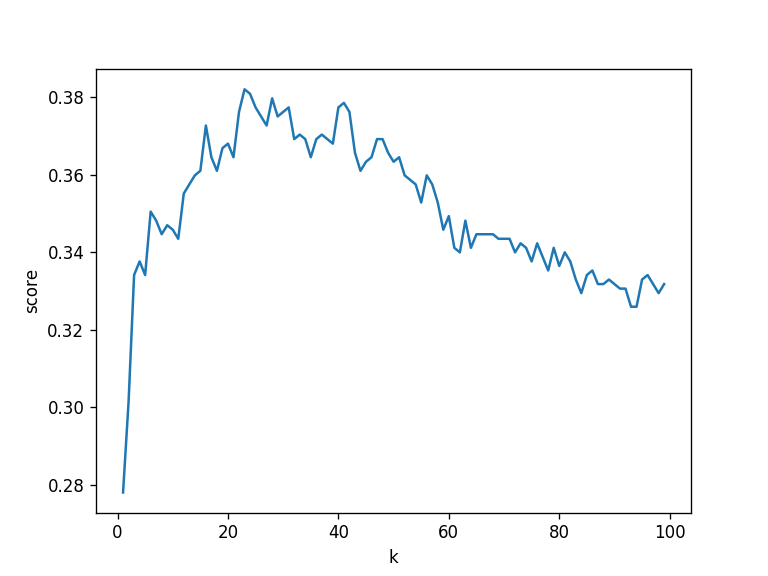

In [87]:
scores = {}

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xp_train, yp_train)
    scores[k] = knn.score(Xp_test, yp_test)

plt.plot([float(y) for y in scores.keys()], [float(x) for x in scores.values()])
plt.xlabel('k')
plt.ylabel('score')
plt.show()